In [2]:
import yfinance as yf
sp500=yf.Ticker("^GSPC")

In [3]:
sp500

yfinance.Ticker object <^GSPC>

In [4]:
sp500=sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,0.0,0.0
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,0.0,0.0
2023-11-20 00:00:00-05:00,4511.700195,4557.109863,4510.359863,4547.379883,3644790000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-11-09 00:00:00-05:00', '2023-11-10 00:00:00-05:00',
               '2023-11-13 00:00:00-05:00', '2023-11-14 00:00:00-05:00',
               '2023-11-15 00:00:00-05:00', '2023-11-16 00:00:00-05:00',
               '2023-11-17 00:00:00-05:00', '2023-11-20 00:00:00-05:00',
               '2023-11-21 00:00:00-05:00', '2023-11-22 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24090, freq=None)

<AxesSubplot:xlabel='Date'>

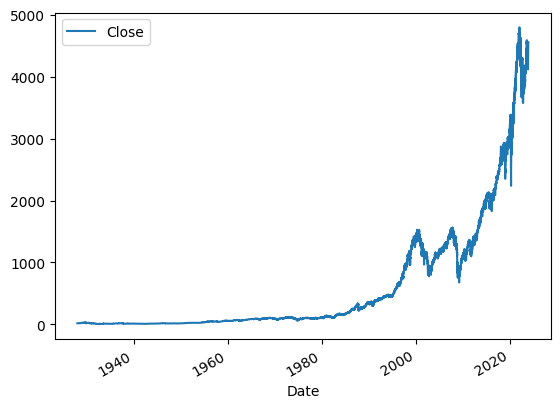

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500["Dividends"]

In [10]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)

In [12]:
sp500["Target"]=(sp500["Tomorrow"]>sp500["Close"]).astype(int)

In [14]:
sp500=sp500.loc["1990-01-01":].copy()

In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-11-16 00:00:00-05:00,4497.080078,4511.990234,4487.830078,4508.240234,3964520000,4514.020020,1
2023-11-17 00:00:00-05:00,4509.549805,4520.120117,4499.660156,4514.020020,3777240000,4547.379883,1
2023-11-20 00:00:00-05:00,4511.700195,4557.109863,4510.359863,4547.379883,3644790000,4538.189941,0
